In [1]:
# import modules & set up logging
import logging
import os

import numpy as np

import gensim
from gensim.models import word2vec

import jieba.analyse
import jieba

In [2]:
# set up logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [3]:
sentence_file_path = './datas/in_the_name_of_people.txt'
word_file_path = './datas/cut_words_of_in_the_name_of_people.txt'
model_file_path1 = './datas/gensim_word2vec1.w2v'
model_file_path2 = './datas/gensim_word2vec2.bin'
model_file_path3 = './datas/gensim_word2vec3_{}.npy'

## 一、分词

In [4]:
# 人民的名义 小说分词
jieba.suggest_freq('沙瑞金',True)
jieba.suggest_freq('田国富',True)
jieba.suggest_freq('高育良',True)
jieba.suggest_freq('侯亮平',True)
jieba.suggest_freq('钟小艾', True)
jieba.suggest_freq('陈岩石', True)
jieba.suggest_freq('欧阳菁', True)
jieba.suggest_freq('易学习', True)
jieba.suggest_freq('王大路', True)
jieba.suggest_freq('蔡成功', True)
jieba.suggest_freq('孙连城', True)
jieba.suggest_freq('季昌明', True)
jieba.suggest_freq('丁义珍', True)
jieba.suggest_freq('郑西坡', True)
jieba.suggest_freq('赵东来', True)
jieba.suggest_freq('高小琴', True)
jieba.suggest_freq('赵瑞龙', True)
jieba.suggest_freq('林华华', True)
jieba.suggest_freq('陆亦可', True)
jieba.suggest_freq('刘新建', True)
jieba.suggest_freq('刘庆祝', True)
jieba.suggest_freq('京州市', True)
jieba.suggest_freq('副市长', True)
jieba.suggest_freq('赵德汉',True)
jieba.suggest_freq('H大学',True)
jieba.suggest_freq('H省',True)
jieba.suggest_freq('政法系', True)

with open(word_file_path,'w', encoding='utf-8') as writer:
    with open(sentence_file_path, 'r', encoding='utf-8') as reader:
        # 加载所有数据
        content = reader.read()
        
        # 分词
        content = jieba.cut(content)
        
        # 合并结果
        result = ' '.join(content)
        
        # 结果输出
        writer.write(result)
print("Done!!!")

Building prefix dict from the default dictionary ...
2023-09-15 22:25:54,652 : DEBUG : Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
2023-09-15 22:25:54,660 : DEBUG : Loading model from cache C:\Users\HP\AppData\Local\Temp\jieba.cache
Loading model cost 1.968 seconds.
2023-09-15 22:25:56,628 : DEBUG : Loading model cost 1.968 seconds.
Prefix dict has been built successfully.
2023-09-15 22:25:56,635 : DEBUG : Prefix dict has been built successfully.


Done!!!


## 二、Gensim Word2Vec构建

#### 训练方式一

In [5]:
# 每行数据加载
print(f"文件路径:{word_file_path}")
sentences = word2vec.LineSentence(word_file_path) 

# 训练Word2Vec模型
"""
class gensim.models.word2vec.Word2Vec(
    sentences=None, corpus_file=None, 
    vector_size=100, alpha=0.025, window=5, min_count=5, max_vocab_size=None, 
    sample=0.001, seed=1, workers=3, min_alpha=0.0001, 
    sg=0, hs=0, negative=5, ns_exponent=0.75, cbow_mean=1, 
    hashfxn=<built-in function hash>, epochs=5, 
    null_word=0, trim_rule=None, sorted_vocab=1, 
    batch_words=10000, compute_loss=False, 
    callbacks=(), comment=None, max_final_vocab=None, shrink_windows=True)
window: 窗口大小 = 周边词 + 1
min_count：单词频数小于该值的单词不参与训练(得不到这类单词对应的向量)
sg: 1(Skip-gram) 0(CBOW) 两个结构
hs: 1(hierarchical softmax) 0(negative) 两个优化
negative: 当hs为0的时候，给定负样本数目，给定为0表示不采用负采样
"""
model = word2vec.Word2Vec(sentences, hs = 1,min_count = 1,window = 3,vector_size = 100)

2023-09-15 22:26:01,175 : INFO : collecting all words and their counts
2023-09-15 22:26:01,178 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


文件路径:./datas/cut_words_of_in_the_name_of_people.txt


2023-09-15 22:26:01,369 : INFO : collected 17863 word types from a corpus of 161145 raw words and 2311 sentences
2023-09-15 22:26:01,372 : INFO : Creating a fresh vocabulary
2023-09-15 22:26:01,611 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 17863 unique words (100.00% of original 17863, drops 0)', 'datetime': '2023-09-15T22:26:01.611463', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'prepare_vocab'}
2023-09-15 22:26:01,613 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 161145 word corpus (100.00% of original 161145, drops 0)', 'datetime': '2023-09-15T22:26:01.613459', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'prepare_vocab'}
2023-09-15 22:26:02,078 : INFO : deleting the raw counts dictionary of 17863 items
2023-09-15 22:26:02,0

#### 训练方式二

In [6]:
# 每行数据加载
sentences = word2vec.LineSentence(word_file_path) 

# 训练Word2Vec模型
model = word2vec.Word2Vec(hs = 1,min_count = 1,window = 5,vector_size = 100)

# 构建词典
model.build_vocab(sentences)

# 模型训练
model.train(sentences, total_examples=model.corpus_count, epochs=5)

2023-09-15 22:26:08,220 : INFO : Word2Vec lifecycle event {'params': 'Word2Vec<vocab=0, vector_size=100, alpha=0.025>', 'datetime': '2023-09-15T22:26:08.220217', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'created'}
2023-09-15 22:26:08,249 : INFO : collecting all words and their counts
2023-09-15 22:26:08,253 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-09-15 22:26:08,430 : INFO : collected 17863 word types from a corpus of 161145 raw words and 2311 sentences
2023-09-15 22:26:08,434 : INFO : Creating a fresh vocabulary
2023-09-15 22:26:08,661 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 17863 unique words (100.00% of original 17863, drops 0)', 'datetime': '2023-09-15T22:26:08.661206', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', '

(601774, 805725)

## 三、Word2Vec应用

### 0. 获取Word2Vec模型相关属性

In [7]:
print("【词汇数目】: {}".format(len(model.wv.key_to_index)))
print("【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: {}".format(model.wv.vector_size))
print("【单词到id的映射关系】: \n{}".format(model.wv.key_to_index))

【词汇数目】: 17863
【转换的稠密的特征向量维度数目,每个单词转换的向量维度大小】: 100
【单词到id的映射关系】: 
{'，': 0, '的': 1, '。': 2, '了': 3, '！': 4, '：': 5, '？': 6, '是': 7, '他': 8, '我': 9, '你': 10, '说': 11, '侯亮平': 12, '在': 13, '也': 14, '就': 15, '…': 16, '和': 17, '啊': 18, '不': 19, '李达康': 20, '这': 21, '有': 22, '着': 23, '都': 24, '高育良': 25, '把': 26, '蔡成功': 27, '让': 28, '祁同伟': 29, '老师': 30, '要': 31, '还': 32, '上': 33, '—': 34, '又': 35, '一个': 36, '吧': 37, '到': 38, '书记': 39, '呢': 40, '吗': 41, '没': 42, '人': 43, '对': 44, '地': 45, '沙瑞金': 46, '得': 47, '、': 48, '给': 49, '她': 50, '高小琴': 51, '就是': 52, '我们': 53, '不是': 54, '知道': 55, '这个': 56, '去': 57, '很': 58, '来': 59, '丁义珍': 60, '自己': 61, '现在': 62, '好': 63, '陆亦可': 64, '陈海': 65, '同志': 66, '欧阳菁': 67, '想': 68, '那': 69, '他们': 70, '啥': 71, '季昌明': 72, '这么': 73, '被': 74, '道': 75, '怎么': 76, '您': 77, '高': 78, '局长': 79, '会': 80, '嘛': 81, '你们': 82, '能': 83, '但': 84, '做': 85, '起来': 86, '没有': 87, '走': 88, '一': 89, '什么': 90, '谁': 91, '向': 92, '却': 93, '还是': 94, '大风': 95, '过': 96, '可': 97, '看': 98, '里': 99, 

### 1. 获取相似度最高的K个演员

In [8]:
# 夹角余弦相似度
req_count = 10
for (word, sim) in model.wv.similar_by_word('沙瑞金', topn =100):
    if len(word)==3:  # 为了过滤一下
        req_count -= 1
        print(word, sim)
        if req_count == 0:
            break;

高育良 0.9471278190612793
季昌明 0.946221649646759
田国富 0.9401828646659851
祁同伟 0.9310567378997803
易学习 0.9295538067817688
侯亮平 0.9204326868057251
李达康 0.9177809953689575
吴春林 0.914404034614563
孙书记 0.9083532094955444
三百块 0.9063376784324646


In [9]:
import jieba.posseg as pseg

jieba.add_word('沙瑞金',10,'nr')
jieba.add_word('田国富',10,'nr')
jieba.add_word('高育良',10,'nr')
jieba.add_word('侯亮平',10,'nr')
jieba.add_word('钟小艾', 10,'nr')
jieba.add_word('陈岩石', 10,'nr')
jieba.add_word('欧阳菁', 10,'nr')
jieba.add_word('易学习', 10,'nr')
jieba.add_word('王大路', 10,'nr')
jieba.add_word('蔡成功', 10,'nr')
jieba.add_word('孙连城', 10,'nr')
jieba.add_word('季昌明', 10,'nr')
jieba.add_word('丁义珍', 10,'nr')
jieba.add_word('郑西坡', 10,'nr')
jieba.add_word('赵东来', 10,'nr')
jieba.add_word('高小琴', 10,'nr')
jieba.add_word('赵瑞龙', 10,'nr')
jieba.add_word('林华华', 10,'nr')
jieba.add_word('陆亦可', 10,'nr')
jieba.add_word('刘新建', 10,'nr')
jieba.add_word('刘庆祝', 10,'nr')
jieba.add_word('京州市', 10,'nr')
jieba.add_word('副市长', 10,'nr')
jieba.add_word('赵德汉',10,'nr')


tmp01 = model.wv.similar_by_word('沙瑞金', topn=100)
tmp01 = dict(tmp01)
for k in tmp01.keys():
    jieba.suggest_freq(k, True)
tmp02 = ''.join(list(tmp01.keys()))
words = pseg.lcut(tmp02)
for word,flag in words:
    if flag == 'nr':
        print(word, tmp01[word])


高育良 0.9471278190612793
季昌明 0.946221649646759
田国富 0.9401828646659851
易学习 0.9295538067817688
侯亮平 0.9204326868057251
孙书记 0.9083532094955444
陈岩石 0.8960018754005432
陆亦可 0.8717615008354187
赵东来 0.8606377840042114


### 2. 获取单词之间的相似度

In [10]:
# 夹角余弦相似度
print(model.wv.similarity('沙瑞金', '高育良'))

0.94712776


### 3. 获取单词的词向量

In [11]:
v1 = model.wv.get_vector("提拔")
print(v1.shape)
print(v1)

(100,)
[-2.77433041e-02  5.97340837e-02 -3.09292488e-02 -1.29078086e-02
 -4.44203941e-03 -1.68389276e-01  8.30356404e-03  2.29993850e-01
  1.93362162e-02  4.73016053e-02  3.51072289e-02 -2.07545877e-01
 -4.99771051e-02  2.16437548e-01  2.09635720e-02 -7.87406191e-02
 -5.10770641e-03 -8.00622851e-02  3.00774574e-02 -2.64273793e-01
 -5.16969450e-02  1.74001008e-01  7.83769935e-02  6.76835105e-02
 -1.28927425e-01  8.76387134e-02 -1.16305999e-01 -1.39182568e-01
 -1.20007955e-01  4.25784476e-02  7.13005811e-02 -5.73348738e-02
  1.19099736e-01  7.14385435e-02  9.18330327e-02  2.13258013e-01
 -3.96736478e-03 -1.46019563e-01 -2.30221152e-02 -2.12162465e-01
 -3.85705801e-03 -4.18692790e-02  2.03526597e-02 -2.14127395e-02
  2.45486394e-01 -1.00091420e-01  2.28592306e-02 -3.80283734e-03
  5.87106459e-02  1.52139470e-01  6.75856471e-02 -3.57802473e-02
  1.61347128e-02 -8.58836025e-02  8.93844217e-02  3.38899381e-02
  1.27961069e-01 -7.62715712e-02 -1.09265946e-01  8.46494436e-02
  8.59752893e-02  

In [12]:
model.wv['提拔']

array([-2.77433041e-02,  5.97340837e-02, -3.09292488e-02, -1.29078086e-02,
       -4.44203941e-03, -1.68389276e-01,  8.30356404e-03,  2.29993850e-01,
        1.93362162e-02,  4.73016053e-02,  3.51072289e-02, -2.07545877e-01,
       -4.99771051e-02,  2.16437548e-01,  2.09635720e-02, -7.87406191e-02,
       -5.10770641e-03, -8.00622851e-02,  3.00774574e-02, -2.64273793e-01,
       -5.16969450e-02,  1.74001008e-01,  7.83769935e-02,  6.76835105e-02,
       -1.28927425e-01,  8.76387134e-02, -1.16305999e-01, -1.39182568e-01,
       -1.20007955e-01,  4.25784476e-02,  7.13005811e-02, -5.73348738e-02,
        1.19099736e-01,  7.14385435e-02,  9.18330327e-02,  2.13258013e-01,
       -3.96736478e-03, -1.46019563e-01, -2.30221152e-02, -2.12162465e-01,
       -3.85705801e-03, -4.18692790e-02,  2.03526597e-02, -2.14127395e-02,
        2.45486394e-01, -1.00091420e-01,  2.28592306e-02, -3.80283734e-03,
        5.87106459e-02,  1.52139470e-01,  6.75856471e-02, -3.57802473e-02,
        1.61347128e-02, -

In [13]:
# 异常：不存在"小明"这个单词
# model.wv.get_vector("小明")

In [14]:
# 首先判断是否存在单词，如果存在，就返回，否则单词直接过滤
word = "小明"
word = "李达康"
if word in model.wv:
    print("【向量】:\n{}".format(model.wv[word]))
else:
    print("【单词不存在】!!!")

【向量】:
[-0.17509815  0.54924834  0.37475738  0.49306512  0.06192301 -0.8444507
  0.23420696  0.7436217  -0.13998188  0.5297995   0.08618437 -0.46734607
 -0.5441663   0.72056705  0.36148655 -0.23846485  0.06554002 -0.5887156
  0.02271746 -1.4166722  -0.76697093  0.6874183   0.8454202   0.1220255
 -0.48686334  0.7887378  -1.0268079   0.01674447 -0.6699326   0.5009935
  0.9430021  -0.5445552   0.5916044   0.39529037  0.7494205   0.8718713
  0.50550205 -0.06069076 -0.35264048 -0.5129053  -0.6232646  -0.10573874
 -0.9615867   0.33442825  1.3674868  -0.8440288   0.12279628  0.64237964
  0.5967652   0.8719559   1.0587466  -0.22586307  0.05810865 -0.30656207
  0.06908159  0.18247981  0.51583284 -0.16730459 -0.6857877   0.7878022
 -0.08283163  0.92175233  0.17667861  0.22489265 -0.7459365   0.9202867
  0.9399114   0.77091014 -0.583874    0.4234624  -0.2772596   0.0417481
  0.08432802  0.55840886  0.9889479   0.7113596   0.28874567 -0.04821005
 -0.5661492  -0.44907755 -1.096004   -0.33632028  0.3

## 四、模型持久化&模型恢复加载

### 方式一：
直接使用save API进行模型持久化

#### 持久化

In [15]:
model.save(model_file_path1)

2023-09-15 22:26:15,543 : INFO : Word2Vec lifecycle event {'fname_or_handle': './datas/gensim_word2vec1.w2v', 'separately': 'None', 'sep_limit': 10485760, 'ignore': frozenset(), 'datetime': '2023-09-15T22:26:15.543553', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'saving'}
2023-09-15 22:26:15,546 : INFO : not storing attribute cum_table
2023-09-15 22:26:16,043 : INFO : saved ./datas/gensim_word2vec1.w2v


#### 加载

In [16]:
# 直接基于路径加载
model1 = word2vec.Word2Vec.load(model_file_path1)
print(model1)

v1 = model1.wv.get_vector("提拔")
print(v1.shape)
print(v1)

2023-09-15 22:26:16,059 : INFO : loading Word2Vec object from ./datas/gensim_word2vec1.w2v
2023-09-15 22:26:16,204 : INFO : loading wv recursively from ./datas/gensim_word2vec1.w2v.wv.* with mmap=None
2023-09-15 22:26:16,206 : INFO : setting ignored attribute cum_table to None
2023-09-15 22:26:16,642 : INFO : Word2Vec lifecycle event {'fname': './datas/gensim_word2vec1.w2v', 'datetime': '2023-09-15T22:26:16.642005', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'loaded'}


Word2Vec<vocab=17863, vector_size=100, alpha=0.025>
(100,)
[-2.77433041e-02  5.97340837e-02 -3.09292488e-02 -1.29078086e-02
 -4.44203941e-03 -1.68389276e-01  8.30356404e-03  2.29993850e-01
  1.93362162e-02  4.73016053e-02  3.51072289e-02 -2.07545877e-01
 -4.99771051e-02  2.16437548e-01  2.09635720e-02 -7.87406191e-02
 -5.10770641e-03 -8.00622851e-02  3.00774574e-02 -2.64273793e-01
 -5.16969450e-02  1.74001008e-01  7.83769935e-02  6.76835105e-02
 -1.28927425e-01  8.76387134e-02 -1.16305999e-01 -1.39182568e-01
 -1.20007955e-01  4.25784476e-02  7.13005811e-02 -5.73348738e-02
  1.19099736e-01  7.14385435e-02  9.18330327e-02  2.13258013e-01
 -3.96736478e-03 -1.46019563e-01 -2.30221152e-02 -2.12162465e-01
 -3.85705801e-03 -4.18692790e-02  2.03526597e-02 -2.14127395e-02
  2.45486394e-01 -1.00091420e-01  2.28592306e-02 -3.80283734e-03
  5.87106459e-02  1.52139470e-01  6.75856471e-02 -3.57802473e-02
  1.61347128e-02 -8.58836025e-02  8.93844217e-02  3.38899381e-02
  1.27961069e-01 -7.62715712e-0

### 方式二：
保存为二进制词向量

#### 持久化

In [17]:
model.wv.save_word2vec_format(model_file_path2, binary=True)

2023-09-15 22:26:16,717 : INFO : storing 17863x100 projection weights into ./datas/gensim_word2vec2.bin


#### 加载

In [18]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format(model_file_path2, binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("提拔")
print(v1.shape)
print(v1)

2023-09-15 22:26:16,962 : INFO : loading projection weights from ./datas/gensim_word2vec2.bin
2023-09-15 22:26:17,442 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (17863, 100) matrix of type float32 from ./datas/gensim_word2vec2.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-09-15T22:26:17.442585', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'load_word2vec_format'}


KeyedVectors<vector_size=100, 17863 keys>
(100,)
[-2.77433041e-02  5.97340837e-02 -3.09292488e-02 -1.29078086e-02
 -4.44203941e-03 -1.68389276e-01  8.30356404e-03  2.29993850e-01
  1.93362162e-02  4.73016053e-02  3.51072289e-02 -2.07545877e-01
 -4.99771051e-02  2.16437548e-01  2.09635720e-02 -7.87406191e-02
 -5.10770641e-03 -8.00622851e-02  3.00774574e-02 -2.64273793e-01
 -5.16969450e-02  1.74001008e-01  7.83769935e-02  6.76835105e-02
 -1.28927425e-01  8.76387134e-02 -1.16305999e-01 -1.39182568e-01
 -1.20007955e-01  4.25784476e-02  7.13005811e-02 -5.73348738e-02
  1.19099736e-01  7.14385435e-02  9.18330327e-02  2.13258013e-01
 -3.96736478e-03 -1.46019563e-01 -2.30221152e-02 -2.12162465e-01
 -3.85705801e-03 -4.18692790e-02  2.03526597e-02 -2.14127395e-02
  2.45486394e-01 -1.00091420e-01  2.28592306e-02 -3.80283734e-03
  5.87106459e-02  1.52139470e-01  6.75856471e-02 -3.57802473e-02
  1.61347128e-02 -8.58836025e-02  8.93844217e-02  3.38899381e-02
  1.27961069e-01 -7.62715712e-02 -1.09265

In [19]:
# 加载模型
model2 = gensim.models.KeyedVectors.load_word2vec_format('./datas/vectors.bin',
                                                         binary=True)
print(model2)

# 应用模型
v1 = model2.get_vector("酒店")
print(v1.shape)
print(v1)

2023-09-15 22:26:17,469 : INFO : loading projection weights from ./datas/vectors.bin
2023-09-15 22:26:17,723 : INFO : KeyedVectors lifecycle event {'msg': 'loaded (7942, 128) matrix of type float32 from ./datas/vectors.bin', 'binary': True, 'encoding': 'utf8', 'datetime': '2023-09-15T22:26:17.723647', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'load_word2vec_format'}


KeyedVectors<vector_size=128, 7942 keys>
(128,)
[ 0.07507085 -0.06233635 -0.08300601 -0.09476656  0.19525695  0.08683676
  0.267884    0.03470918  0.14521684  0.00294149 -0.02735998 -0.09170757
  0.00139181  0.2421832  -0.09511401  0.0341509   0.0283838   0.32073992
  0.172025    0.20465788  0.05929533  0.07462119 -0.23834492  0.0421031
 -0.0448295  -0.02866336  0.05001667 -0.1257836   0.22431172 -0.0807058
 -0.12493779 -0.05265829  0.13126895  0.15061386 -0.19615541 -0.09053446
 -0.05627611 -0.23135136 -0.01231913 -0.23680945 -0.04299964  0.3667591
 -0.06821534 -0.29599202  0.34265348 -0.04311483 -0.21866152 -0.2495054
 -0.43372962  0.0463162   0.11516414  0.07433167  0.09803177 -0.06165684
 -0.1319202   0.04795204  0.2651979   0.09628078 -0.16381025  0.12577897
  0.11097272 -0.15810862 -0.07860032  0.08296187  0.12618895  0.28030068
 -0.00506122  0.05640052  0.11889897 -0.11027029 -0.14830197 -0.00842615
  0.01188814  0.19347009  0.00282715 -0.3220406   0.22365303 -0.23093392
 -0.418

### 方式三：
直接使用NumPy API保存词向量信息

#### 持久化

In [20]:
# 获取词向量
norm_word_embeddings = model.wv.get_normed_vectors()  # L2-norm归一化转换后的单词向量
word_embeddings = model.wv.vectors  # 归一化转换前的单词向量
# 获取词典(词典到idx的映射)
vocab_2_index = list(map(lambda k: (k, model.wv.key_to_index[k]), model.wv.key_to_index))
print(np.shape(norm_word_embeddings), np.shape(word_embeddings), np.shape(vocab_2_index))
# 数据保存
np.save(model_file_path3.format("norm_embedding"), norm_word_embeddings)
np.save(model_file_path3.format("embedding"), word_embeddings)
np.save(model_file_path3.format("vocab_2_index"), vocab_2_index)

(17863, 100) (17863, 100) (17863, 2)


#### 加载

In [21]:
# 加载数据
norm_word_embeddings = np.load(model_file_path3.format("norm_embedding"))
word_embeddings = np.load(model_file_path3.format("embedding"))
vocab_2_index = np.load(model_file_path3.format("vocab_2_index"))

# 字典转换
vocab_2_index = dict(map(lambda t:(t[0], int(t[1])), vocab_2_index))

# 获取数据
word = "提拔"
index = vocab_2_index[word]
v1 = word_embeddings[index]
print(v1.shape)
print(v1)

(100,)
[-2.77433041e-02  5.97340837e-02 -3.09292488e-02 -1.29078086e-02
 -4.44203941e-03 -1.68389276e-01  8.30356404e-03  2.29993850e-01
  1.93362162e-02  4.73016053e-02  3.51072289e-02 -2.07545877e-01
 -4.99771051e-02  2.16437548e-01  2.09635720e-02 -7.87406191e-02
 -5.10770641e-03 -8.00622851e-02  3.00774574e-02 -2.64273793e-01
 -5.16969450e-02  1.74001008e-01  7.83769935e-02  6.76835105e-02
 -1.28927425e-01  8.76387134e-02 -1.16305999e-01 -1.39182568e-01
 -1.20007955e-01  4.25784476e-02  7.13005811e-02 -5.73348738e-02
  1.19099736e-01  7.14385435e-02  9.18330327e-02  2.13258013e-01
 -3.96736478e-03 -1.46019563e-01 -2.30221152e-02 -2.12162465e-01
 -3.85705801e-03 -4.18692790e-02  2.03526597e-02 -2.14127395e-02
  2.45486394e-01 -1.00091420e-01  2.28592306e-02 -3.80283734e-03
  5.87106459e-02  1.52139470e-01  6.75856471e-02 -3.57802473e-02
  1.61347128e-02 -8.58836025e-02  8.93844217e-02  3.38899381e-02
  1.27961069e-01 -7.62715712e-02 -1.09265946e-01  8.46494436e-02
  8.59752893e-02  

# 五、扩展：直接从文件中读取数据来进行模型训练

In [22]:
from gensim import utils
from gensim.models.word2vec import Word2Vec


class MyData(object):
    def __iter__(self):
        path = word_file_path
        with open(path, 'r', encoding='utf-8') as reader:
            for line in reader:
                yield list(utils.tokenize(line))

# 模型构建
model_ = Word2Vec(hs = 1,min_count = 1,window = 5,vector_size = 100, sentences=MyData())

2023-09-15 22:26:18,035 : INFO : collecting all words and their counts
2023-09-15 22:26:18,038 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2023-09-15 22:26:18,419 : INFO : collected 17807 word types from a corpus of 131945 raw words and 2421 sentences
2023-09-15 22:26:18,421 : INFO : Creating a fresh vocabulary
2023-09-15 22:26:18,608 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 retains 17807 unique words (100.00% of original 17807, drops 0)', 'datetime': '2023-09-15T22:26:18.608740', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', 'platform': 'Windows-10-10.0.18362-SP0', 'event': 'prepare_vocab'}
2023-09-15 22:26:18,609 : INFO : Word2Vec lifecycle event {'msg': 'effective_min_count=1 leaves 131945 word corpus (100.00% of original 131945, drops 0)', 'datetime': '2023-09-15T22:26:18.609738', 'gensim': '4.2.0', 'python': '3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]', '

In [23]:
# 夹角余弦相似度
req_count = 5
for key in model_.wv.similar_by_word('沙瑞金', topn =100):
    if len(key[0])==3:
        req_count -= 1
        print(key[0], key[1])
        if req_count == 0:
            break;

高育良 0.9752787947654724
李达康 0.9707772731781006
田国富 0.9612881541252136
易学习 0.9604923129081726
祁同伟 0.9581397175788879


# 六、扩展：可视化

In [24]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling


def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    #vectors = np.asarray(model.wv.vectors)
    #labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings
    vectors = np.asarray(model.wv.vectors)[:1000]
    labels = np.asarray(model.wv.index_to_key)[:1000]  # fixed-width numpy strings
    print(vectors.shape)

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels



def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):
    from plotly.offline import init_notebook_mode, iplot, plot
    import plotly.graph_objs as go

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels):
    import matplotlib.pyplot as plt
    import random
    
    plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
    plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))


In [25]:
x_vals, y_vals, labels = reduce_dimensions(model)

(1000, 100)


D:\programs\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
D:\programs\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


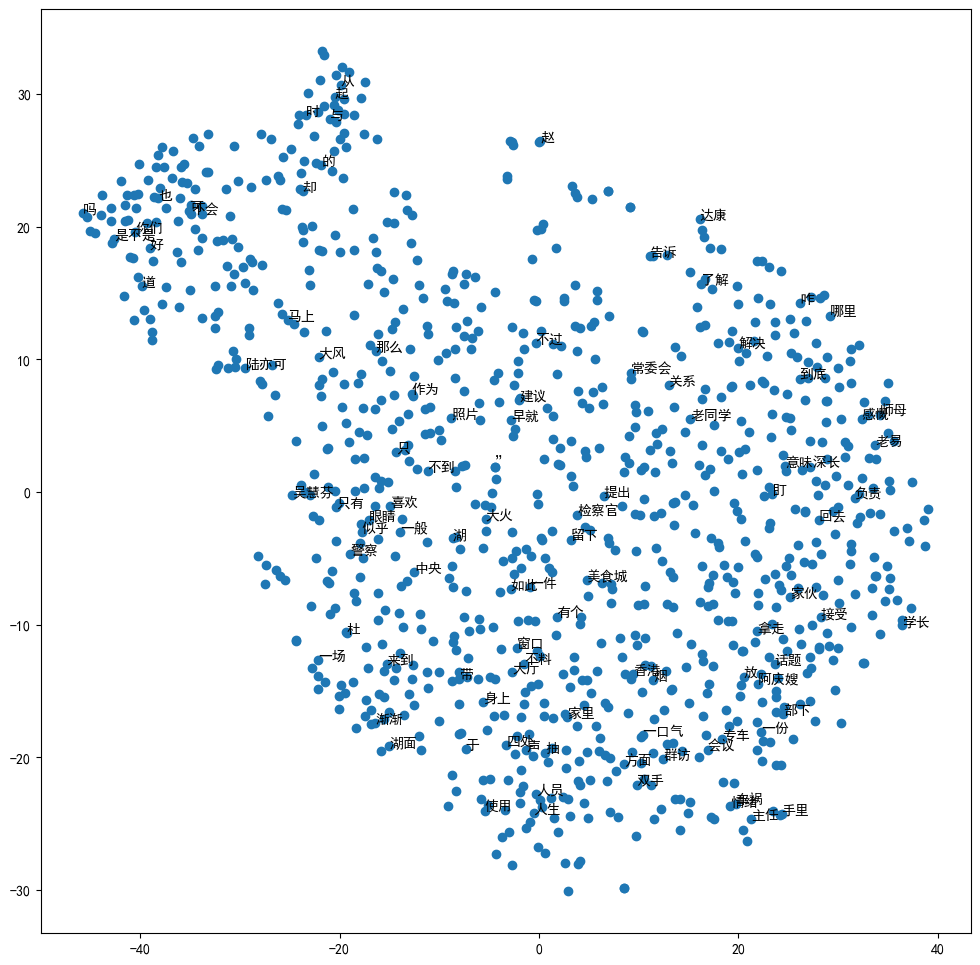

In [26]:
plot_with_matplotlib(x_vals, y_vals, labels)